In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import (classification_report, confusion_matrix, 
                           roc_curve, auc, precision_recall_curve, 
                           average_precision_score, accuracy_score,
                           precision_score, recall_score, f1_score,
                           roc_auc_score)
from sklearn.preprocessing import label_binarize



Training data shape: (50000, 3072)
Test data shape: (10000, 3072)


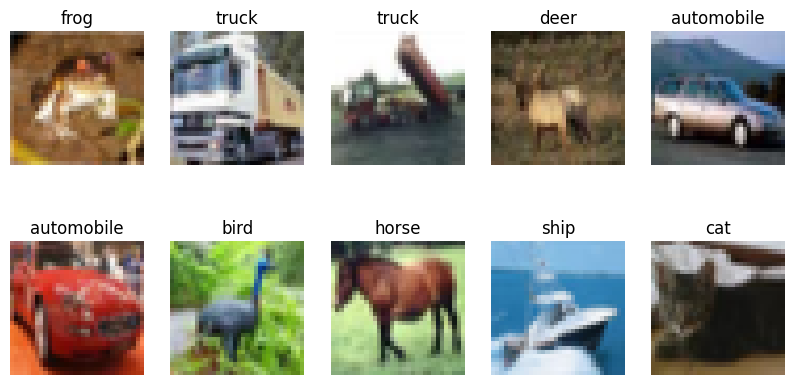

In [4]:
# 1. Load and preprocess data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(-1, 32*32*3).astype('float32') / 255
X_test = X_test.reshape(-1, 32*32*3).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# EDA
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(32, 32, 3))
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()

In [5]:
# 2. Model Building
def build_cifar_model():
    model = Sequential([
        Dense(512, activation='relu', input_shape=(32*32*3,)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    return model

# 3. Training with different batch sizes
batch_sizes = [32, 64]
histories = []

for bs in batch_sizes:
    print(f"\nTraining with batch size: {bs}")
    model = build_cifar_model()
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=10,
        batch_size=bs,
        verbose=1
    )
    histories.append(history)


Training with batch size: 32


C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.2618 - loss: 2.2272 - val_accuracy: 0.3261 - val_loss: 1.8644
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.3439 - loss: 1.8344 - val_accuracy: 0.3375 - val_loss: 1.8623
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.3600 - loss: 1.8017 - val_accuracy: 0.3544 - val_loss: 1.8015
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.3556 - loss: 1.8030 - val_accuracy: 0.3720 - val_loss: 1.8230
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.3612 - loss: 1.7822 - val_accuracy: 0.3920 - val_loss: 1.7030
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.3641 - loss: 1.7798 - val_accuracy: 0.4053 - val_loss: 1.6911
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.3612 - loss: 1.7742 - val_accuracy: 0.3580 - val_loss: 1.7867
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.3682 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Evaluation for Batch Size = 32

Classification Report:
              precision    recall  f1-score   support

    airplane       0.58      0.41      0.48      1000
  automobile       0.62      0.41      0.49      1000
        bird       0.28      0.30      0.29      1000
         cat       0.33      0.12      0.18      1000
        deer       0.32      0.50      0.39      1000
         dog       0.33      0.39      0.36      1000
        frog       0.35      0.63      0.45      1000
       horse       0.59      0.31      0.41      1000
        ship       0.50      0.62      0.55      1000
       truck       0.50      0.44      0.47      1000

    accuracy                           0.41     10000
   macro avg       0.44      0.41      0.41     10000
weighted avg       0.44      0.41      0.41     10000



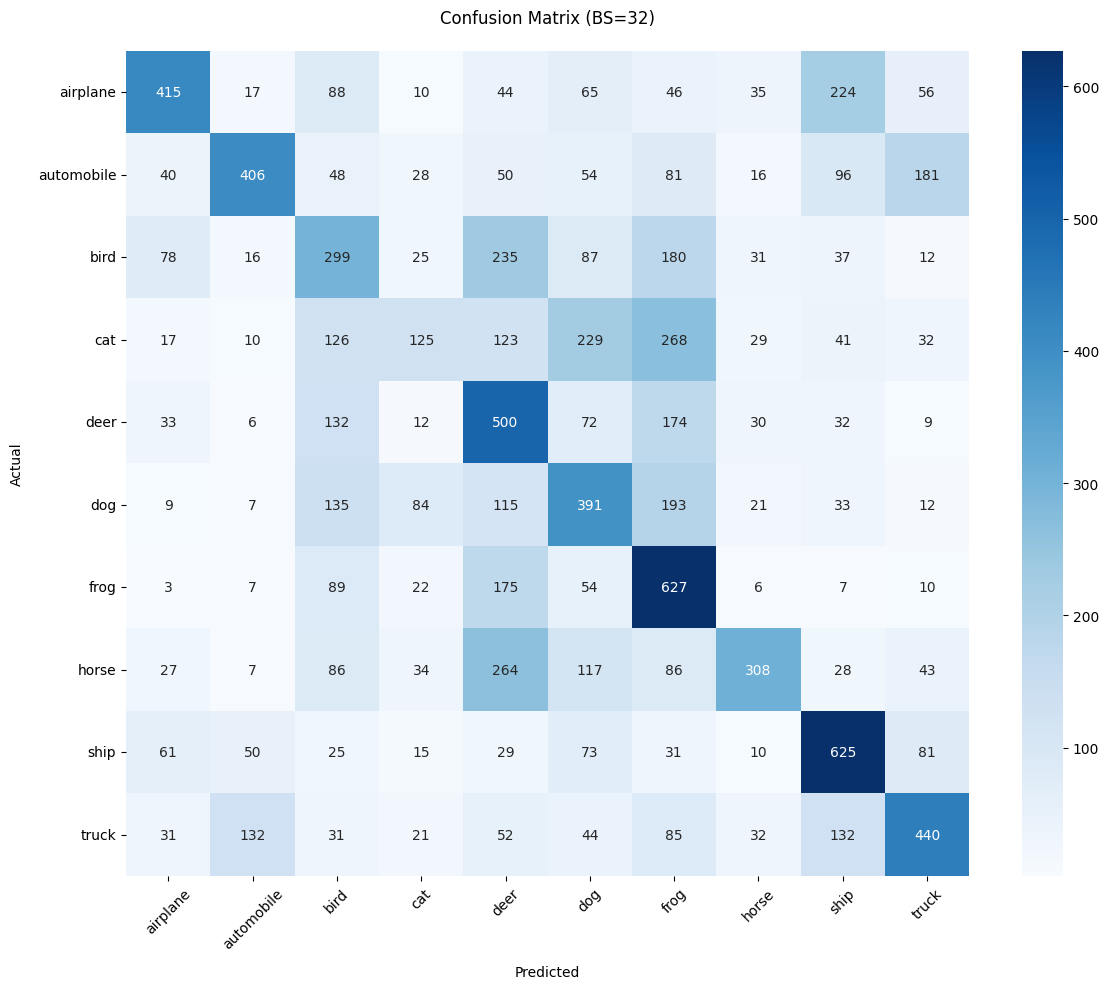

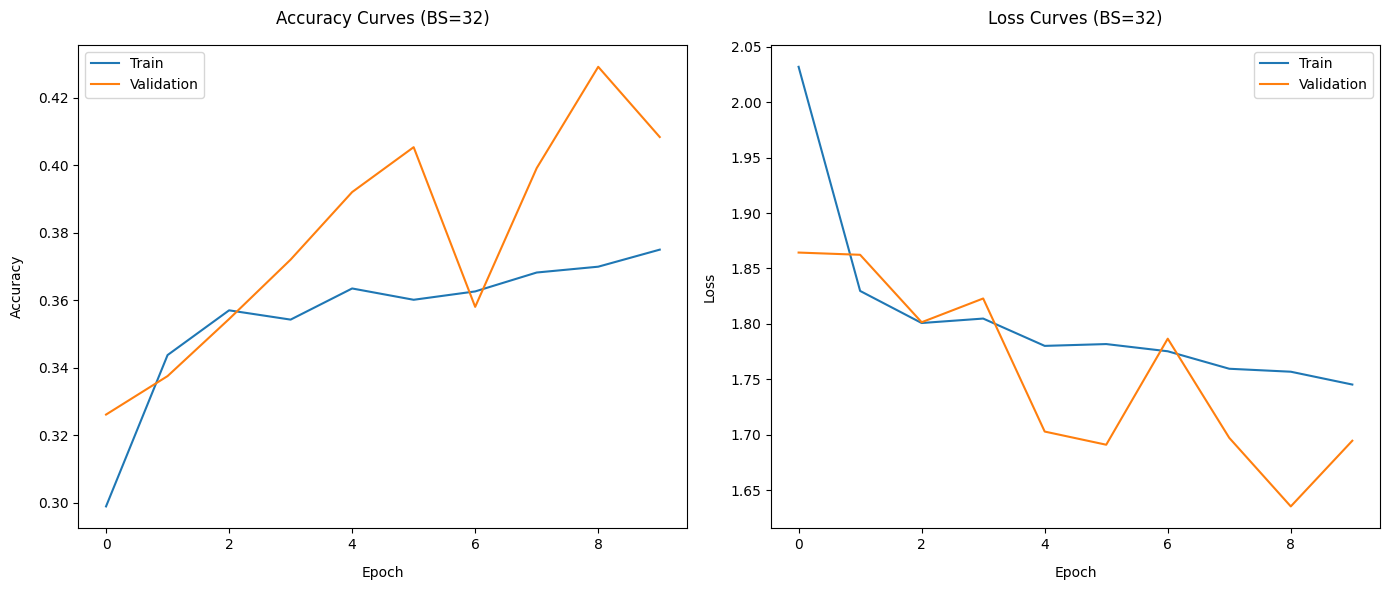

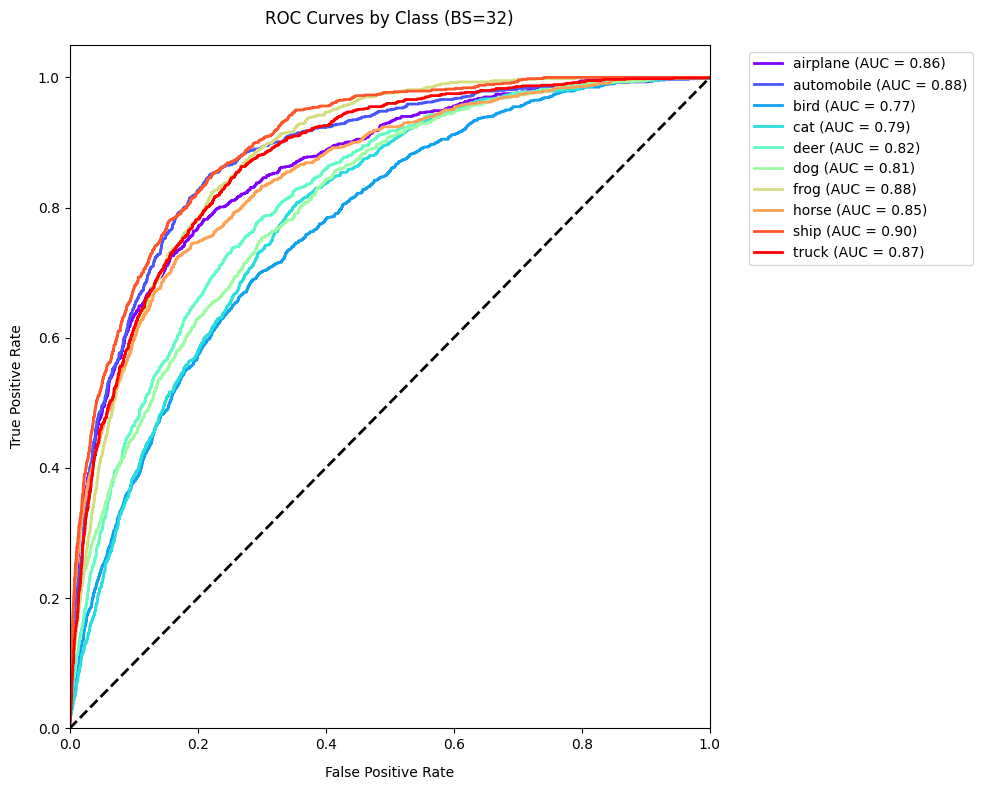

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Evaluation for Batch Size = 64

Classification Report:
              precision    recall  f1-score   support

    airplane       0.51      0.56      0.53      1000
  automobile       0.57      0.57      0.57      1000
        bird       0.34      0.26      0.29      1000
         cat       0.30      0.20      0.24      1000
        deer       0.38      0.29      0.33      1000
         dog       0.39      0.32      0.35      1000
        frog       0.37      0.70      0.48      1000
       horse       0.42      0.60      0.49      1000
        ship       0.63      0.45      0.52      1000
       truck       0.55      0.48      0.51      1000

    accuracy                           0.44     10000
   macro avg       0.45      0.44      0.43     10000
weighted avg       0.45      0.44      0.43     10000



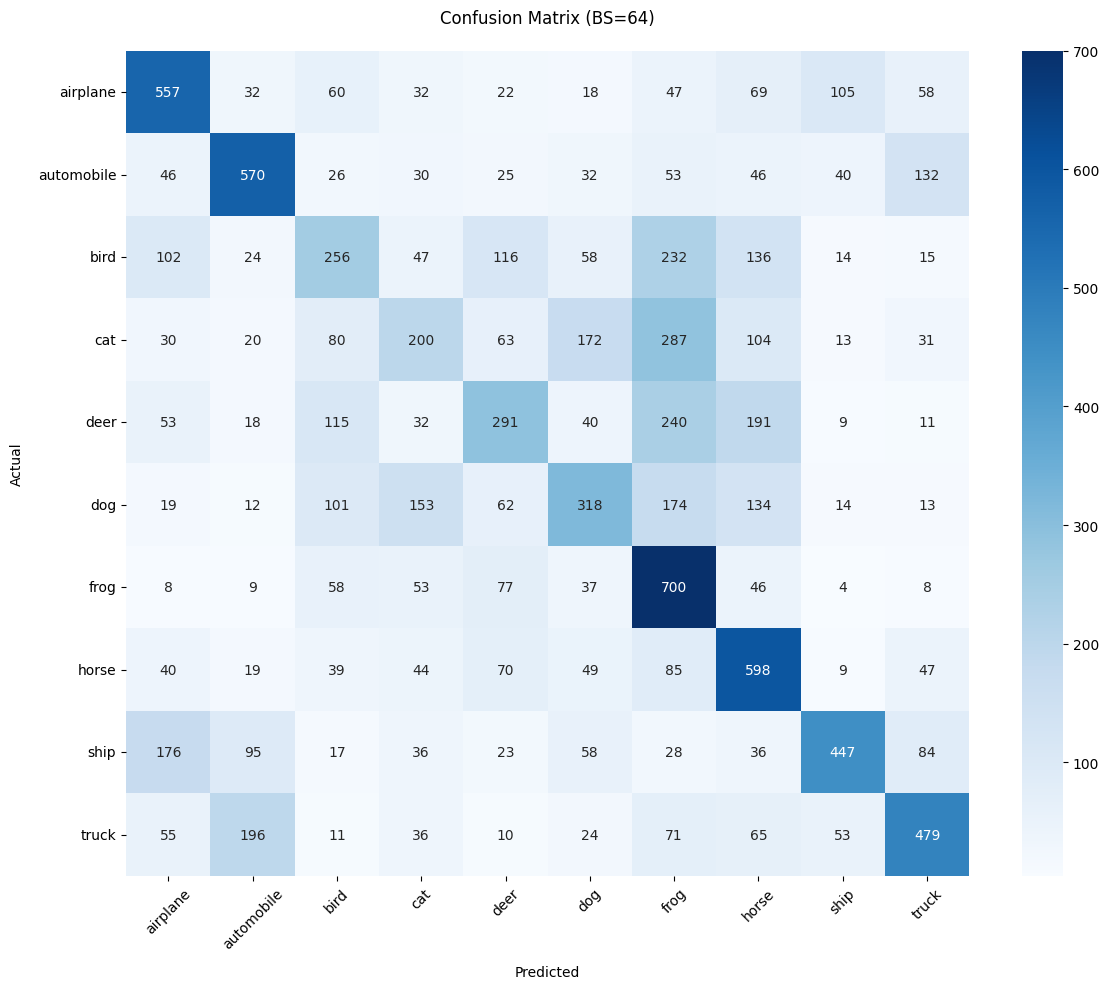

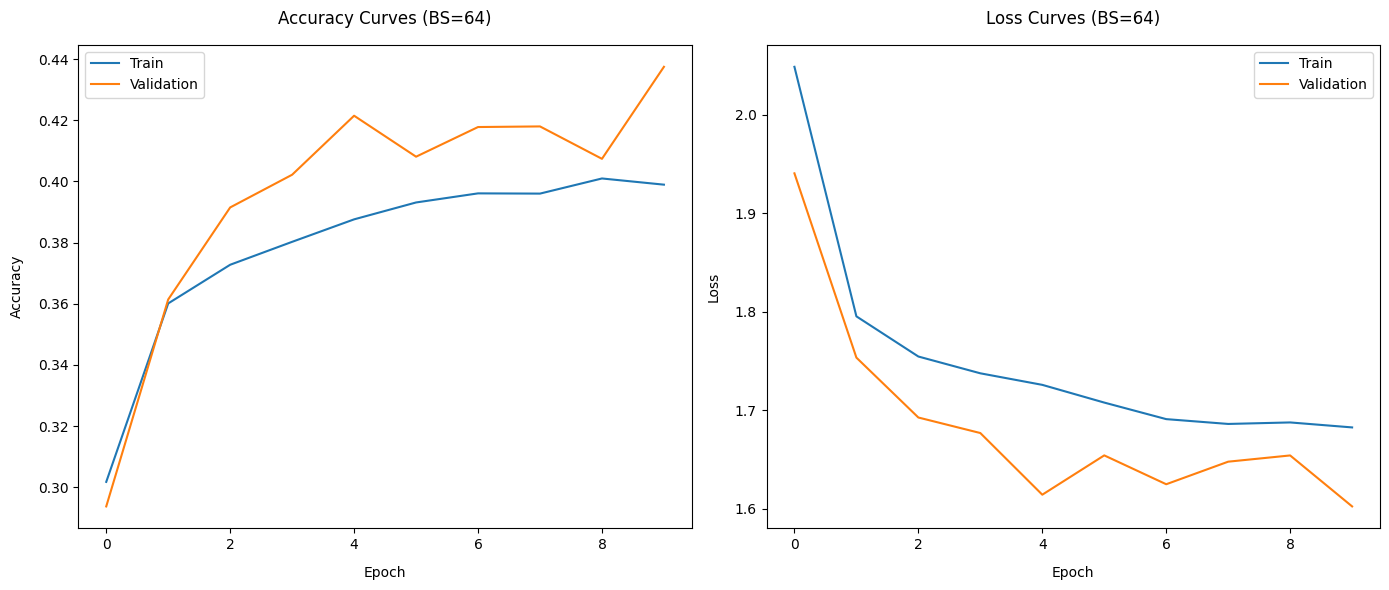

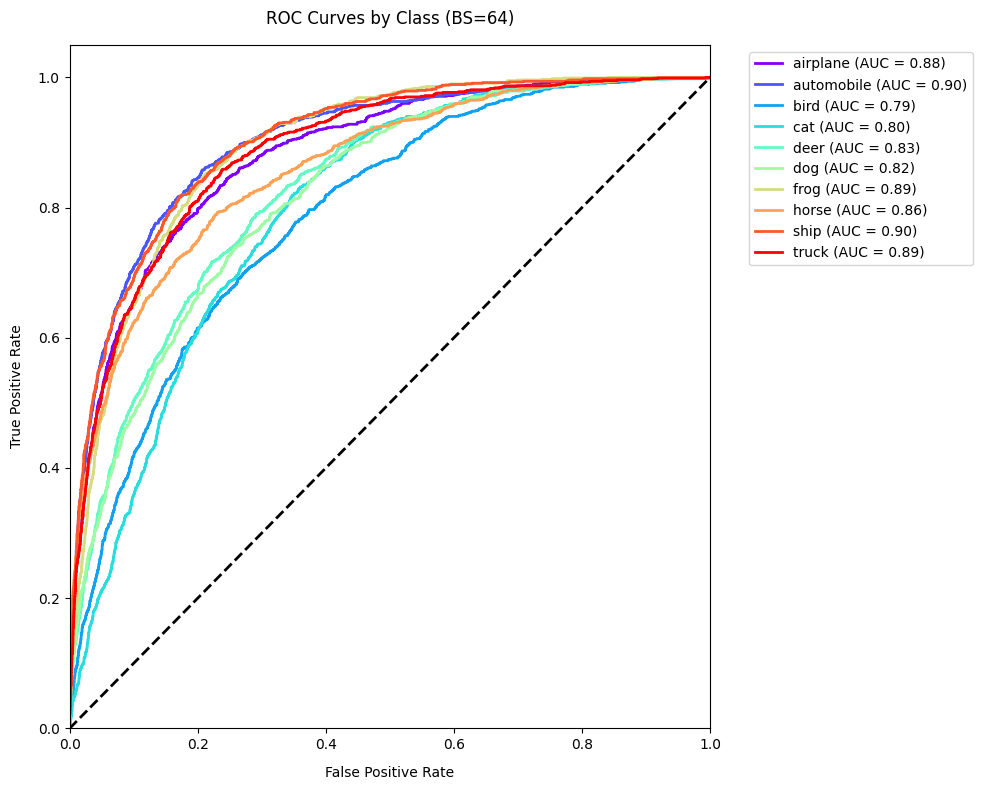

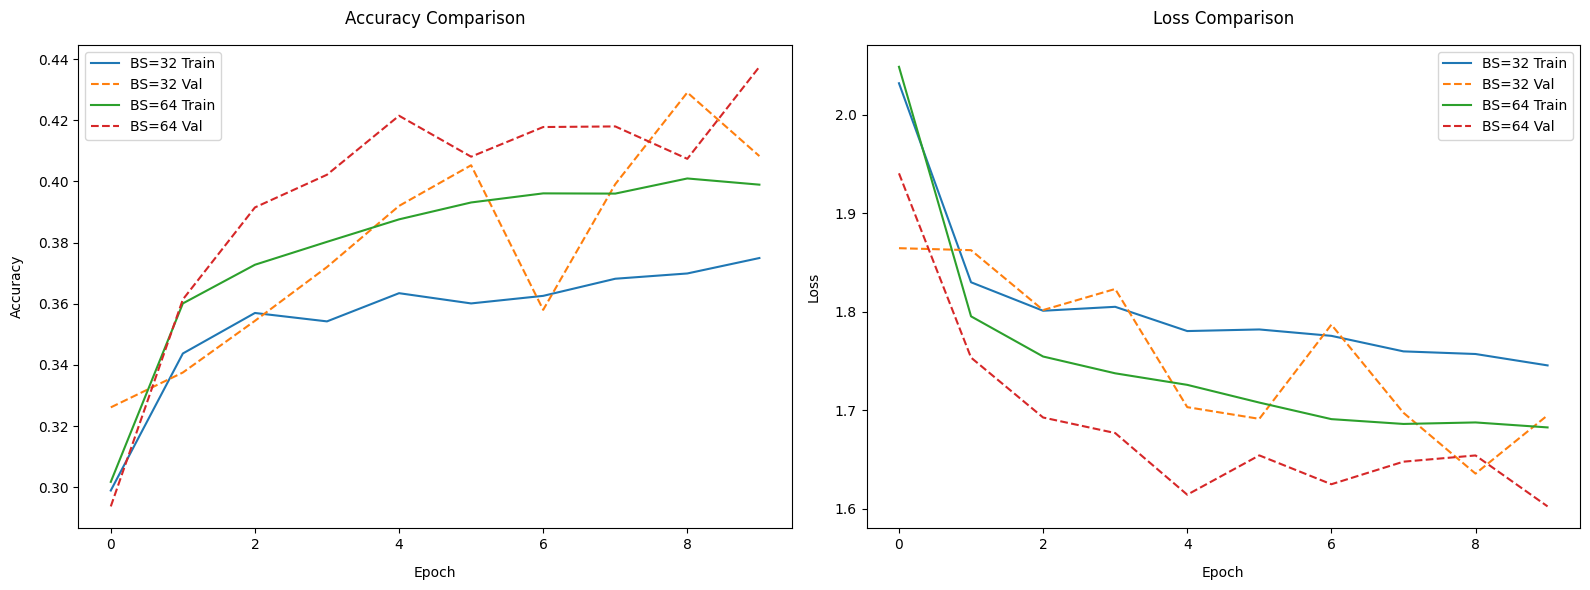

<Figure size 1200x600 with 0 Axes>

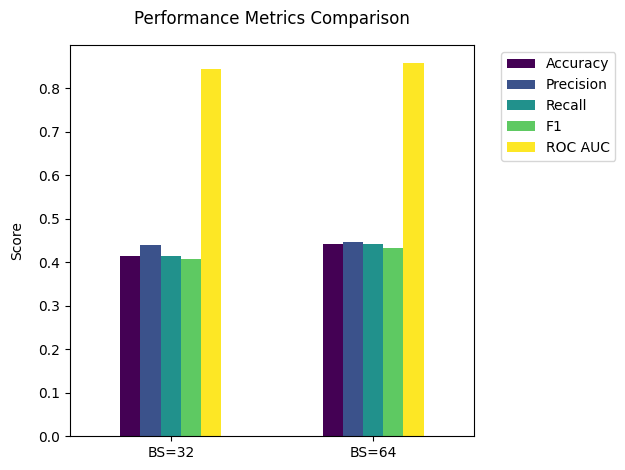

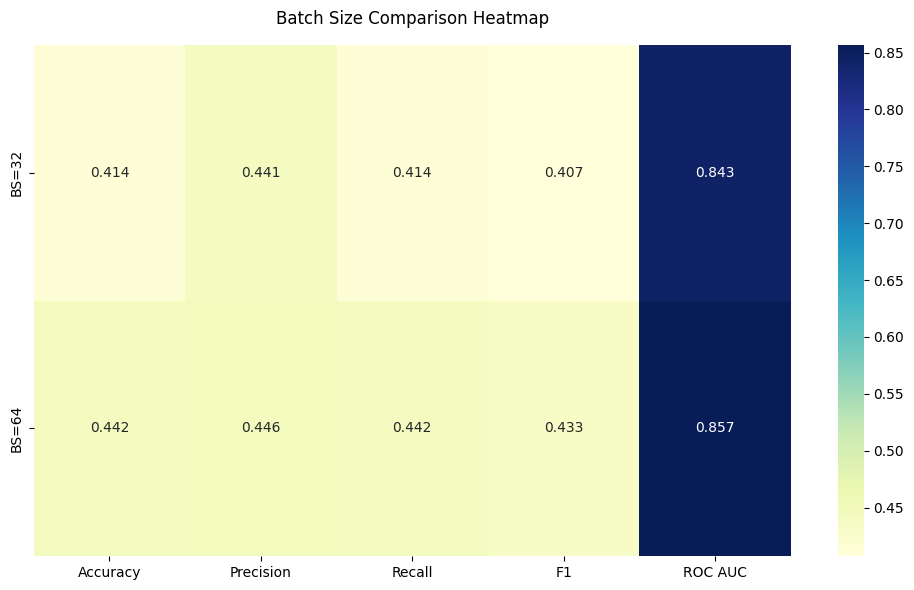

In [16]:
# 1. Individual Model Evaluation Function
def enhanced_cifar_evaluation(model, history, X_test, y_test, batch_size):
    # Predictions
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Classification Report
    print(f"\n{'='*40}\nEvaluation for Batch Size = {batch_size}\n{'='*40}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    # Confusion Matrix
    plt.figure(figsize=(12, 10))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix (BS={batch_size})', pad=20)
    plt.xlabel('Predicted', labelpad=10)
    plt.ylabel('Actual', labelpad=10)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Accuracy/Loss Curves
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'Accuracy Curves (BS={batch_size})', pad=15)
    plt.ylabel('Accuracy', labelpad=10)
    plt.xlabel('Epoch', labelpad=10)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'Loss Curves (BS={batch_size})', pad=15)
    plt.ylabel('Loss', labelpad=10)
    plt.xlabel('Epoch', labelpad=10)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # ROC-AUC Curves
    y_test_bin = label_binarize(y_true, classes=range(10))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(10, 8))
    colors = plt.cm.rainbow(np.linspace(0, 1, 10))
    for i, color in zip(range(10), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', labelpad=10)
    plt.ylabel('True Positive Rate', labelpad=10)
    plt.title(f'ROC Curves by Class (BS={batch_size})', pad=15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Return metrics
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='macro'),
        'Recall': recall_score(y_true, y_pred, average='macro'),
        'F1': f1_score(y_true, y_pred, average='macro'),
        'ROC AUC': roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
    }

# 2. Evaluate both models
eval_bs32 = enhanced_cifar_evaluation(histories[0].model, histories[0], X_test, y_test, 32)
eval_bs64 = enhanced_cifar_evaluation(histories[1].model, histories[1], X_test, y_test, 64)

# 3. Comparative Analysis
metrics_df = pd.DataFrame({
    'BS=32': eval_bs32,
    'BS=64': eval_bs64
}).T

# Combined Training Curves
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(histories[0].history['accuracy'], label='BS=32 Train')
plt.plot(histories[0].history['val_accuracy'], '--', label='BS=32 Val')
plt.plot(histories[1].history['accuracy'], label='BS=64 Train')
plt.plot(histories[1].history['val_accuracy'], '--', label='BS=64 Val')
plt.title('Accuracy Comparison', pad=15)
plt.ylabel('Accuracy', labelpad=10)
plt.xlabel('Epoch', labelpad=10)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(histories[0].history['loss'], label='BS=32 Train')
plt.plot(histories[0].history['val_loss'], '--', label='BS=32 Val')
plt.plot(histories[1].history['loss'], label='BS=64 Train')
plt.plot(histories[1].history['val_loss'], '--', label='BS=64 Val')
plt.title('Loss Comparison', pad=15)
plt.ylabel('Loss', labelpad=10)
plt.xlabel('Epoch', labelpad=10)
plt.legend()
plt.tight_layout()
plt.show()

# Metrics Comparison Bar Plot
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', colormap='viridis')
plt.title('Performance Metrics Comparison', pad=15)
plt.ylabel('Score', labelpad=10)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Metrics Comparison Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Batch Size Comparison Heatmap', pad=15)
plt.tight_layout()
plt.show()